In [6]:
import json
import pandas as pd
import glob
import os
import sys
import torch
import random
from PIL import Image
import matplotlib.pyplot as plt
sys.path.append("C:/Users/yuuta/Documents/fashion")

from utils.util import filter_basic_items, is_target_category
from utils.util import calc_roc_auc
from utils.infer import topic_model_infer

In [2]:
negative_path = glob.glob(
    # "C:/Users/yuuta/Documents/fashion/data/negative_coordinates/**.json"
    "C:/Users/yuuta/Documents/fashion/data/negative_coordinates_random/**.json"
)

In [3]:
with open(
    "C:/Users/yuuta/Documents/fashion/data/attributes_test.json",
    encoding="shift-jis"
) as f:
    to_attributes = json.load(f)

In [4]:
def show_image(image_path):
    # 画像を開く
    img = Image.open(image_path)

    # 画像を表示
    plt.imshow(img)
    plt.axis('off')  # 軸を非表示にする
    plt.show()

['floral_Silk', 'floral_Brown', 'floral_leopard']


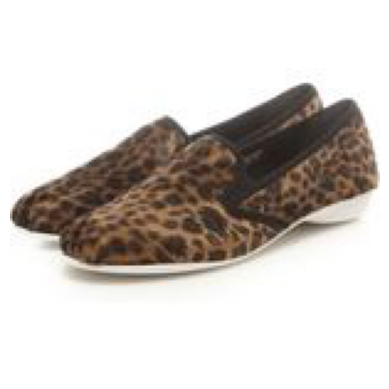

['crochet_Silk', 'crochet_Beige', 'crochet_plain']


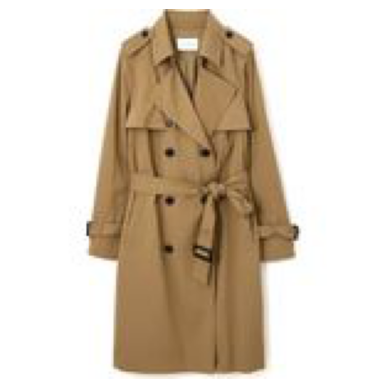

['crochet_Silk', 'crochet_Beige', 'crochet_geo']


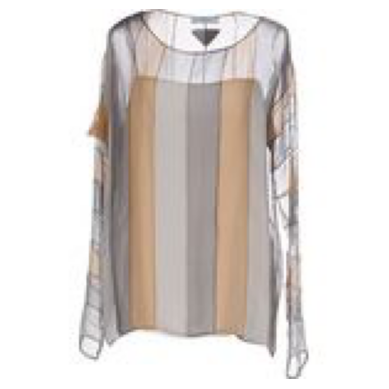

['floral_Denim', 'floral_Black', 'floral_geo']


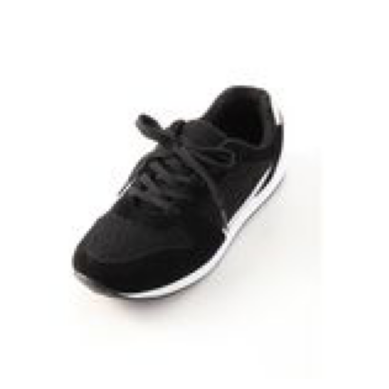

['crochet_Silk', 'crochet_Black', 'crochet_geo']


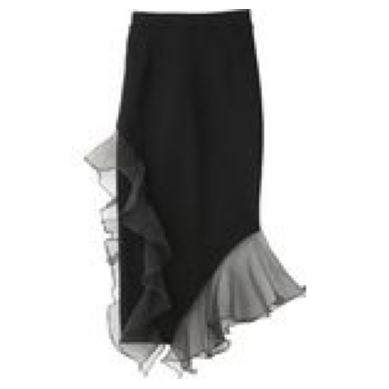

['floral_Silk', 'floral_Green', 'floral_vertical']


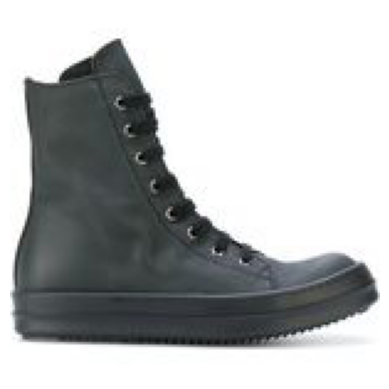

In [7]:
for fp in negative_path[:3]:
    json_dict = pd.read_json(fp, encoding="shift-jis")
    items = filter(is_target_category, json_dict["items"])
    items = filter_basic_items(json_dict["items"])
    for item in items:
        itemId = str(item["itemId"])
        attr = to_attributes[itemId]
        image_path = f"C:/Users/yuuta/Documents/fashion/data/images/{itemId}.jpg"
        print(attr)
        show_image(image_path)
    # score = topic_model_infer(attributes)
    